In [ ]:
import numpy as np

H = np.array([
    [0, 1/2, 1/2, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

alpha = 0.85
n = 5
E = np.ones((n, n)) / n
G = alpha * H + (1 - alpha) * E


def power_method(G, tol=1e-6, max_iter=100):
    n = G.shape[0]
    y = np.ones(n) / n

    for _ in range(max_iter):
      y_new = G@y
      y_new /= np.linalg.norm(y_new, 1)

      if np.linalg.norm(y_new - y) < tol:
          return y_new

      y = y_new

    return y_new

pagerank = power_method(G)
print(pagerank)

[0.2 0.2 0.2 0.2 0.2]


In [ ]:
pagerank_percent = pagerank * 100
print(pagerank_percent)

[20. 20. 20. 20. 20.]


<BarContainer object of 5 artists>

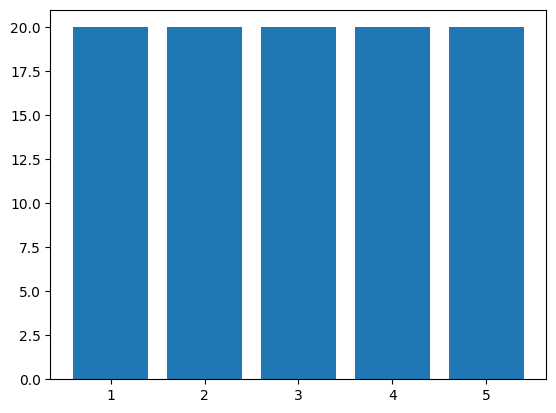

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1, n + 1), pagerank_percent)

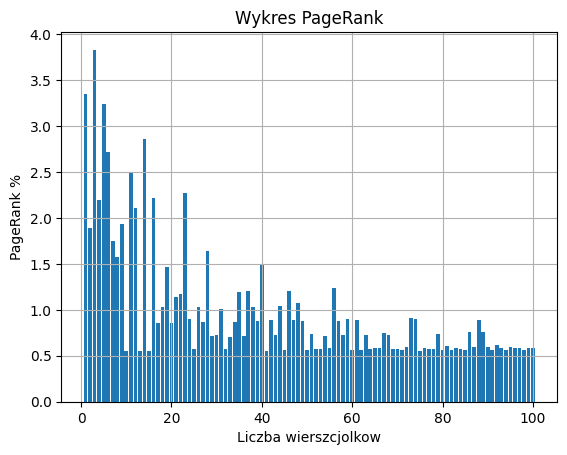

In [ ]:
path_file1 = "/content/web_network.csv"

web_network = np.loadtxt(path_file1, delimiter=",")

n = web_network.shape[0]
E = np.ones((n, n)) / n
G1 = alpha * web_network + (1 - alpha) * E

pagerank1 = power_method(G1)
pagerank1_procent = pagerank1 * 100
plt.bar(range(1, n + 1), pagerank1_procent)
plt.xlabel("Liczba wierszcjolkow")
plt.ylabel("PageRank %")
plt.title("Wykres PageRank")
plt.grid(True)


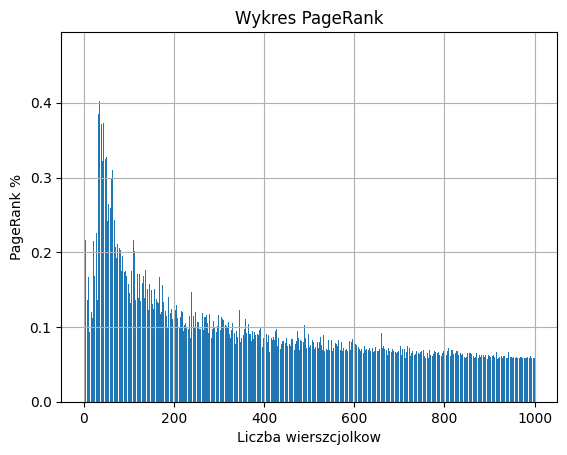

In [ ]:
path_file2 = "/content/web_network1000.csv"

web_network1000 = np.loadtxt(path_file2, delimiter=",")

n = web_network1000.shape[0]
E = np.ones((n, n)) / n
G2 = alpha * web_network1000 + (1 - alpha) * E

pagerank2 = power_method(G2)
pagerank2_procent = pagerank2 * 100
plt.bar(range(1, n + 1), pagerank2_procent)
plt.xlabel("Website")
plt.ylabel("PageRank %")
plt.title("PageRank chart")
plt.grid(True)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(G2.T)
max_eigenvalue_index = np.argmax(np.abs(eigenvalues))
principal_eigenvector = np.abs(eigenvectors[:, max_eigenvalue_index])
principal_eigenvector /= principal_eigenvector.sum()
diff = np.linalg.norm(pagerank2 - principal_eigenvector, 1)
print(diff)

0.38832755694944066


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(G1.T)
max_eigenvalue_index = np.argmax(np.abs(eigenvalues))
principal_eigenvector = np.abs(eigenvectors[:, max_eigenvalue_index])
principal_eigenvector /= principal_eigenvector.sum()
diff = np.linalg.norm(pagerank1 - principal_eigenvector, 1)
print(diff)

0.46793744350501704
